In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


In [2]:
pwd()

'C:\\Users\\preet\\Downloads\\Airbnb\\Austin'

In [3]:

listing = pd.read_csv("listings.csv")
review = pd.read_csv("reviews.csv")

In [4]:
calendar = pd.read_csv("cal.csv" ,engine='python')

In [5]:
calendar.head()

listing_id        date available   price adjusted_price  minimum_nights  \
0      140474  20-04-2020         f  $72.00         $72.00             5.0   
1      140504  20-04-2020         f  $50.00         $50.00             2.0   
2      140504  21-04-2020         f  $50.00         $50.00             2.0   
3      140504  22-04-2020         f  $50.00         $50.00             2.0   
4      140504  23-04-2020         f  $50.00         $50.00             3.0   

   maximum_nights  
0           365.0  
1           365.0  
2           365.0  
3           365.0  
4           365.0

In [6]:
listing.head()

id                                               name  host_id  \
0  2265   Zen-East in the Heart of Austin (monthly rental)     2466   
1  5245  Eco friendly, Colorful, Clean, Cozy monthly share     2466   
2  5456          Walk to 6th, Rainey St and Convention Ctr     8028   
3  5769                                     NW Austin Room     8186   
4  6413                      Gem of a Studio near Downtown    13879   

   host_name  neighbourhood_group  neighbourhood  latitude  longitude  \
0      Paddy                  NaN          78702  30.27750  -97.71398   
1      Paddy                  NaN          78702  30.27577  -97.71379   
2     Sylvia                  NaN          78702  30.26112  -97.73448   
3  Elizabeth                  NaN          78729  30.45697  -97.78422   
4       Todd                  NaN          78704  30.24829  -97.73726   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    225              30                 24  2019-03-16   
1     Private room    100              30                  9  2018-03-14   
2  Entire home/apt     95               2                532  2020-03-19   
3     Private room     40               1                257  2019-11-03   
4  Entire home/apt     99              30                112  2020-03-08   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.18                               3                 0  
1               0.07                               3                 0  
2               3.93                               1               353  
3               2.10                               1                25  
4               0.89                               1                 0

In [7]:
review.head()

listing_id        date
0        2265  2009-03-17
1        2265  2009-03-22
2        2265  2011-03-16
3        2265  2012-03-15
4        2265  2012-03-19

In [8]:
print(listing['id'].value_counts())

23564286    1
39152398    1
26247417    1
38157693    1
17531239    1
           ..
33850629    1
40101987    1
25079015    1
39058058    1
37011456    1
Name: id, Length: 11282, dtype: int64


In [9]:
print(review['listing_id'].value_counts())

1021139     951
214795      793
1462311     787
949922      772
202187      729
           ... 
28584604      1
31952235      1
25227143      1
39237708      1
42930768      1
Name: listing_id, Length: 8837, dtype: int64


In [10]:
print(calendar['listing_id'].value_counts())

4171932     366
2926298     366
8740559     366
11526499    366
5247943     366
           ... 
12941286    365
364025      365
5539288     365
13841198    355
13203006      3
Name: listing_id, Length: 2873, dtype: int64


In [11]:
listing['listing_id'] = listing['id']

In [12]:
listing = listing.drop('id',axis = 1)

In [13]:
listing.head()

name  host_id  host_name  \
0   Zen-East in the Heart of Austin (monthly rental)     2466      Paddy   
1  Eco friendly, Colorful, Clean, Cozy monthly share     2466      Paddy   
2          Walk to 6th, Rainey St and Convention Ctr     8028     Sylvia   
3                                     NW Austin Room     8186  Elizabeth   
4                      Gem of a Studio near Downtown    13879       Todd   

   neighbourhood_group  neighbourhood  latitude  longitude        room_type  \
0                  NaN          78702  30.27750  -97.71398  Entire home/apt   
1                  NaN          78702  30.27577  -97.71379     Private room   
2                  NaN          78702  30.26112  -97.73448  Entire home/apt   
3                  NaN          78729  30.45697  -97.78422     Private room   
4                  NaN          78704  30.24829  -97.73726  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    225              30                 24  2019-03-16               0.18   
1    100              30                  9  2018-03-14               0.07   
2     95               2                532  2020-03-19               3.93   
3     40               1                257  2019-11-03               2.10   
4     99              30                112  2020-03-08               0.89   

   calculated_host_listings_count  availability_365  listing_id  
0                               3                 0        2265  
1                               3                 0        5245  
2                               1               353        5456  
3                               1                25        5769  
4                               1                 0        6413

In [14]:
df = pd.merge(review,listing,on='listing_id')

In [15]:
revagg = pd.DataFrame(df['listing_id'].value_counts())

In [16]:
revagg.reset_index(inplace=True)

In [17]:
revagg['review_count'] = revagg['listing_id']

In [18]:
revagg = revagg.drop('listing_id', axis = 1)

In [19]:
revagg['listing_id'] = revagg['index']

In [20]:
revagg = revagg.drop('index', axis = 1)

In [21]:
revagg.head()

review_count  listing_id
0           951     1021139
1           793      214795
2           787     1462311
3           772      949922
4           729      202187

In [22]:
df.head()

listing_id        date                                              name  \
0        2265  2009-03-17  Zen-East in the Heart of Austin (monthly rental)   
1        2265  2009-03-22  Zen-East in the Heart of Austin (monthly rental)   
2        2265  2011-03-16  Zen-East in the Heart of Austin (monthly rental)   
3        2265  2012-03-15  Zen-East in the Heart of Austin (monthly rental)   
4        2265  2012-03-19  Zen-East in the Heart of Austin (monthly rental)   

   host_id host_name  neighbourhood_group  neighbourhood  latitude  longitude  \
0     2466     Paddy                  NaN          78702   30.2775  -97.71398   
1     2466     Paddy                  NaN          78702   30.2775  -97.71398   
2     2466     Paddy                  NaN          78702   30.2775  -97.71398   
3     2466     Paddy                  NaN          78702   30.2775  -97.71398   
4     2466     Paddy                  NaN          78702   30.2775  -97.71398   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    225              30                 24  2019-03-16   
1  Entire home/apt    225              30                 24  2019-03-16   
2  Entire home/apt    225              30                 24  2019-03-16   
3  Entire home/apt    225              30                 24  2019-03-16   
4  Entire home/apt    225              30                 24  2019-03-16   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.18                               3                 0  
1               0.18                               3                 0  
2               0.18                               3                 0  
3               0.18                               3                 0  
4               0.18                               3                 0

In [23]:
df = pd.merge(revagg,listing,on='listing_id')

In [24]:
df.head()

review_count  listing_id  \
0           951     1021139   
1           793      214795   
2           787     1462311   
3           772      949922   
4           729      202187   

                                                name  host_id host_name  \
0                 Backyard Cottage in Central Austin  5620519     Steve   
1                Cute Condo Close to Zilker & Dwntwn  1109019    Kristi   
2  Stay and Enjoy The Austin Texas House South Co...   740347   Stephen   
3            Vintage Airstream in East Austin, Texas  5152543  Marcella   
4                    South Congress Studio Apartment   989596      John   

   neighbourhood_group  neighbourhood  latitude  longitude        room_type  \
0                  NaN          78722  30.29087  -97.71895  Entire home/apt   
1                  NaN          78704  30.25341  -97.77369  Entire home/apt   
2                  NaN          78704  30.24705  -97.75555  Entire home/apt   
3                  NaN          78723  30.29940  -97.67747  Entire home/apt   
4                  NaN          78704  30.24776  -97.74527  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     90               1                951  2020-04-04              11.17   
1     99               2                793  2020-03-21               7.59   
2    135               1                787  2020-04-01               9.96   
3     60               1                772  2020-03-21               8.87   
4     85               1                729  2020-02-27               6.98   

   calculated_host_listings_count  availability_365  
0                               1                84  
1                               1               170  
2                               1               306  
3                               2               345  
4                               2               296

In [25]:
calendar['listing_id'].value_counts()

4171932     366
2926298     366
8740559     366
11526499    366
5247943     366
           ... 
12941286    365
364025      365
5539288     365
13841198    355
13203006      3
Name: listing_id, Length: 2873, dtype: int64

In [26]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   listing_id      1048575 non-null  int64  
 1   date            1048575 non-null  object 
 2   available       1048575 non-null  object 
 3   price           1048575 non-null  object 
 4   adjusted_price  1048575 non-null  object 
 5   minimum_nights  1048290 non-null  float64
 6   maximum_nights  1048290 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 56.0+ MB


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8837 entries, 0 to 8836
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   review_count                    8837 non-null   int64  
 1   listing_id                      8837 non-null   int64  
 2   name                            8837 non-null   object 
 3   host_id                         8837 non-null   int64  
 4   host_name                       8835 non-null   object 
 5   neighbourhood_group             0 non-null      float64
 6   neighbourhood                   8837 non-null   int64  
 7   latitude                        8837 non-null   float64
 8   longitude                       8837 non-null   float64
 9   room_type                       8837 non-null   object 
 10  price                           8837 non-null   int64  
 11  minimum_nights                  8837 non-null   int64  
 12  number_of_reviews               88

In [28]:
df['listing_id'].value_counts()

23564286    1
14632346    1
22928801    1
38579615    1
21292446    1
           ..
32850669    1
37182190    1
714922      1
40919793    1
16517121    1
Name: listing_id, Length: 8837, dtype: int64

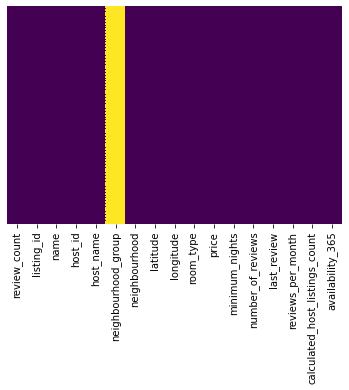

In [29]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
df = df.drop('neighbourhood_group', axis = 1)

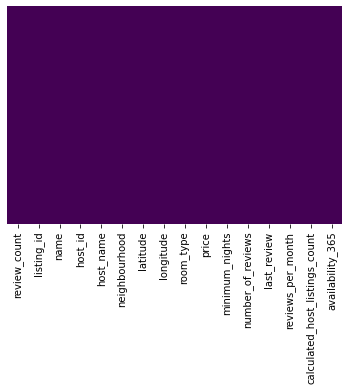

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [90]:
desc =pd.DataFrame(df.describe().transpose())
pd.options.display.float_format = '{:,.5f}'.format
desc

count             mean              std  \
review_count                   8,837.00000         39.98122         69.04817   
listing_id                     8,837.00000 23,119,083.91796 12,653,692.66947   
host_id                        8,837.00000 73,459,149.99570 82,659,209.38818   
neighbourhood                  8,837.00000     78,721.99762         20.64653   
latitude                       8,837.00000         30.27872          0.05758   
longitude                      8,837.00000        -97.75063          0.05686   
price                          8,837.00000        484.83467      1,585.87702   
minimum_nights                 8,837.00000          4.95881         15.38795   
number_of_reviews              8,837.00000         39.98122         69.04817   
reviews_per_month              8,837.00000          1.55549          1.91146   
calculated_host_listings_count 8,837.00000         15.53672         46.59799   
availability_365               8,837.00000        123.07378        135.71944   

                                        min              25%              50%  \
review_count                        1.00000          4.00000         13.00000   
listing_id                      2,265.00000 13,471,658.00000 23,416,160.00000   
host_id                            23.00000  8,167,447.00000 38,159,186.00000   
neighbourhood                  78,701.00000     78,704.00000     78,705.00000   
latitude                           30.11885         30.24503         30.26636   
longitude                         -98.05355        -97.76584        -97.74341   
price                               0.00000         75.00000        125.00000   
minimum_nights                      1.00000          1.00000          2.00000   
number_of_reviews                   1.00000          4.00000         13.00000   
reviews_per_month                   0.01000          0.24000          0.86000   
calculated_host_listings_count      1.00000          1.00000          1.00000   
availability_365                    0.00000          0.00000         78.00000   

                                             75%               max  
review_count                            45.00000         951.00000  
listing_id                      33,985,928.00000  43,157,726.00000  
host_id                        114,353,388.00000 341,351,623.00000  
neighbourhood                       78,744.00000      78,759.00000  
latitude                                30.29943          30.51228  
longitude                              -97.72067         -97.56169  
price                                  255.00000      10,000.00000  
minimum_nights                           2.00000         500.00000  
number_of_reviews                       45.00000         951.00000  
reviews_per_month                        2.26000          36.85000  
calculated_host_listings_count           4.00000         259.00000  
availability_365                       246.00000         365.00000

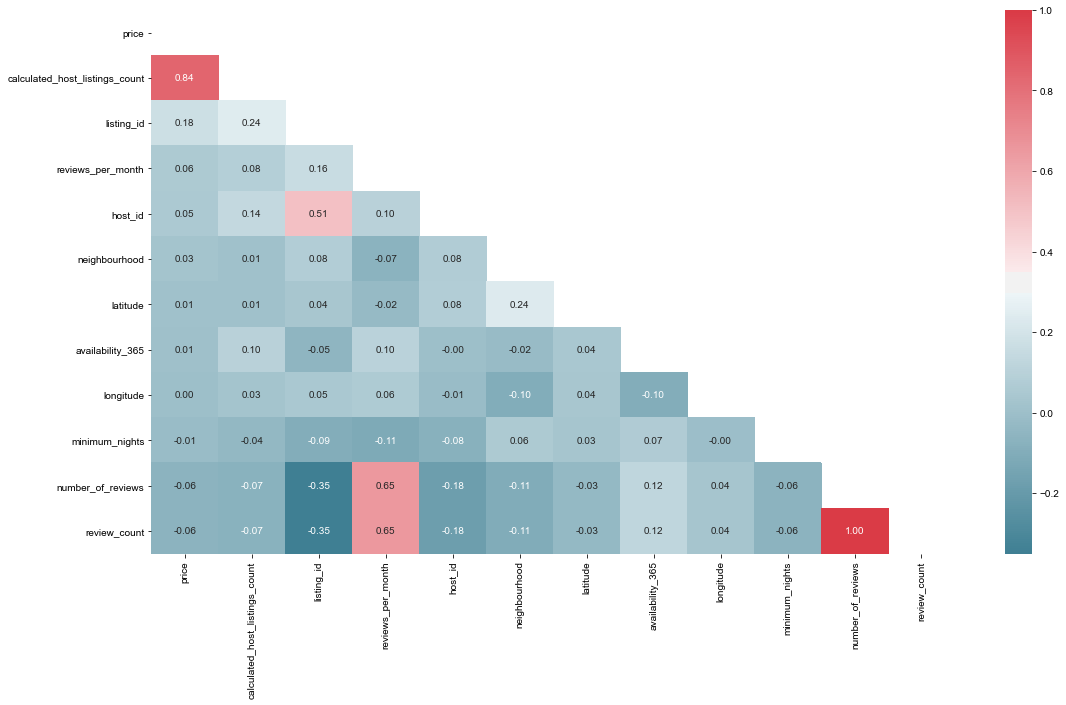

In [32]:
corr = df.corr()
top_corr_cols = corr.price.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(18, 10))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.5)
plt.show()
del corr, dropSelf, top_corr

In [33]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [34]:
import plotly.graph_objs as go

In [35]:
import geojsonio as gjs

In [38]:
import plotly.express as px
import geopandas as gpd

In [40]:
geojs = gpd.read_file('neighbourhoods.geojson')

In [41]:
df['longitude'].count()

8837

No handles with labels found to put in legend.


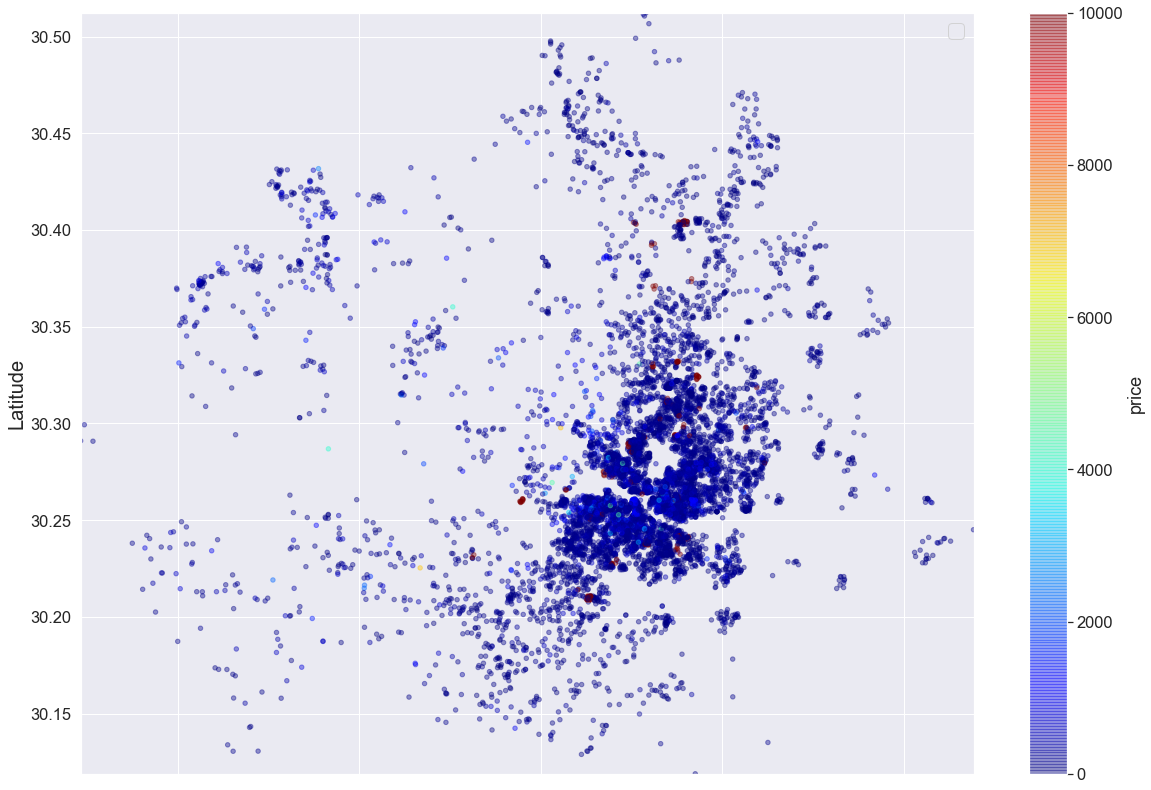

In [42]:
# plot the data
ax = df.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    figsize=(20,14),
    c="price", 
    cmap=plt.get_cmap("jet"),
    colorbar=True, 
    alpha=0.4,
)
# use our map with it's bounding coordinates
           
# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
# set the min/max axis values - these must be the same as above
plt.ylim(30.11885, 30.51228 )
plt.xlim(-98.05355, -97.56169)
plt.legend(fontsize=20)
plt.show()

In [43]:
import folium
from folium.plugins import FastMarkerCluster
from branca.colormap import LinearColormap

In [44]:
lat = df['latitude'].tolist()
lon = df['longitude'].tolist()
locations = list(zip(lat, lon))

map1 = folium.Map(location=[30.2671509, -97.7430573], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [63]:
for i in range(0,4438):
    if '{{' in df['name'].iloc[i]:
        print(i)

for x in range(4438,8835):
    if '{{' in df['name'].iloc[x]:
        print(x)

2703
2904
3140
3321


In [69]:
for i in [2703,2904,3140,3321]:
    nam = df['name'].iloc[i]
    df['name'].iloc[i] = nam[2:]


In [70]:
df['name'].iloc[2703]

'MASTER BEDROOM, 3 QUEEN BEDS, FREE PARKING, POOL'

In [72]:

m = folium.Map(
    location=[30.2671509, -97.7430573],
    zoom_start=13
)

for x in range(0,8837):
    if df['price'].iloc[x] > 5000:
        folium.Marker(
            tooltip=df['price'].iloc[x],
            location=[df['latitude'].iloc[x],df['longitude'].iloc[x]],
            popup=df['name'].iloc[x],
            color='red',
            fill_color = 'red',
            fill=False,
        ).add_to(m)

    

m

In [47]:
lat = df['latitude'].tolist()
lon = df['longitude'].tolist()
price = df['price'].tolist()
locations = list(zip(lat, lon,price))

map1 = folium.Map(location=[30.2671509, -97.7430573], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [73]:
df['price_color'] = pd.cut(df['price'],bins = 4,labels = ['0-500','500-2000','2000-5000','5000-10000'])

In [74]:
df['price_color'].head()

0    0-500
1    0-500
2    0-500
3    0-500
4    0-500
Name: price_color, dtype: category
Categories (4, object): [0-500 < 500-2000 < 2000-5000 < 5000-10000]

In [75]:
df['price'].head()

0     90
1     99
2    135
3     60
4     85
Name: price, dtype: int64

In [76]:
df['price_color'].tail(7)

8830         0-500
8831    5000-10000
8832         0-500
8833         0-500
8834         0-500
8835         0-500
8836         0-500
Name: price_color, dtype: category
Categories (4, object): [0-500 < 500-2000 < 2000-5000 < 5000-10000]

In [77]:
df['price'].tail(7)

8830       58
8831    10000
8832      695
8833      200
8834      234
8835       83
8836       45
Name: price, dtype: int64

In [92]:
df['marker_color'] = df['price_color'].replace({'0-500':'yellow','500-2000':'green','2000-5000':'blue','5000-10000':'red'})

In [93]:
df['marker_color'].head()

0    yellow
1    yellow
2    yellow
3    yellow
4    yellow
Name: marker_color, dtype: object

In [115]:
df['price_color'] = df['price'].apply(lambda x: 'green' if x in range(0,500) else ('blue' if x in range(500,2500) else ('red' if x in range(2500,5000) else 'purple')) )

In [121]:
df[df['name'] == 'Luxury in Premium Downtown Location']

review_count  listing_id                                 name   host_id  \
647           138     5423999  Luxury in Premium Downtown Location  18548240   

    host_name  neighbourhood  latitude  longitude        room_type  price  \
647     James          78702  30.26740  -97.72677  Entire home/apt    535   

     minimum_nights  number_of_reviews last_review  reviews_per_month  \
647               3                138  2020-03-08            2.22000   

     calculated_host_listings_count  availability_365 price_color  
647                               1               145        blue

In [120]:
df = df.drop('marker_color', axis =1)

In [122]:
df[df['name'] == 'Luxury in Premium Downtown Location']

review_count  listing_id                                 name   host_id  \
647           138     5423999  Luxury in Premium Downtown Location  18548240   

    host_name  neighbourhood  latitude  longitude        room_type  price  \
647     James          78702  30.26740  -97.72677  Entire home/apt    535   

     minimum_nights  number_of_reviews last_review  reviews_per_month  \
647               3                138  2020-03-08            2.22000   

     calculated_host_listings_count  availability_365 price_color  
647                               1               145        blue

In [123]:
m = folium.Map(location=[30.2671509, -97.7430573],
            zoom_start=12
          )
for i in range(0,1000):
    if (df['price_color'].iloc[i] == 'green'):
        folium.Marker(
            [df['latitude'].iloc[i], df['longitude'].iloc[i]],
            icon=folium.Icon(color = 'green', icon = 'info-sign'),
            tooltip=df['price'].iloc[i],
            popup = df['name'].iloc[i]
        ).add_to(m)

In [124]:
m

In [131]:
m = folium.Map(location=[30.2671509, -97.7430573],
            zoom_start=12
          )
for i in range(0,1000):
    folium.Marker(
        [df['latitude'].iloc[i], df['longitude'].iloc[i]],
        icon=folium.Icon(color = df['price_color'].iloc[i], icon = 'info-sign'),
        tooltip=df['price'].iloc[i],
        popup = df['name'].iloc[i]
    ).add_to(m)
    

In [132]:
m

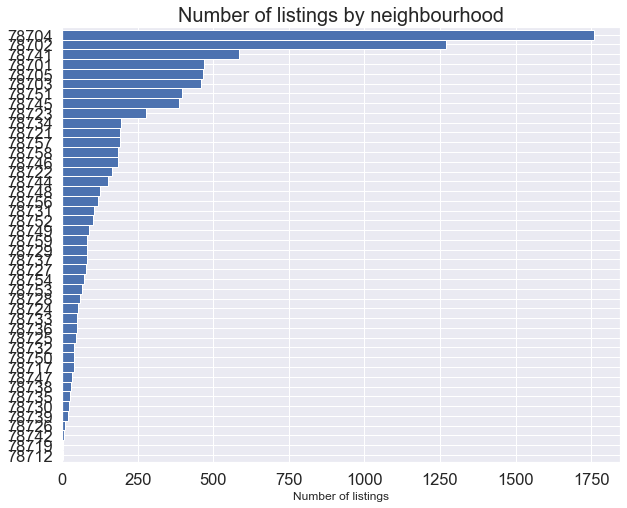

In [134]:
feq=df['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8837 entries, 0 to 8836
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   review_count                    8837 non-null   int64  
 1   listing_id                      8837 non-null   int64  
 2   name                            8837 non-null   object 
 3   host_id                         8837 non-null   int64  
 4   host_name                       8835 non-null   object 
 5   neighbourhood                   8837 non-null   int64  
 6   latitude                        8837 non-null   float64
 7   longitude                       8837 non-null   float64
 8   room_type                       8837 non-null   object 
 9   price                           8837 non-null   int64  
 10  minimum_nights                  8837 non-null   int64  
 11  number_of_reviews               8837 non-null   int64  
 12  last_review                     88

In [152]:
col = list(df['price_color'].unique())

In [159]:
pt = px.scatter(df, x='number_of_reviews', y = 'price', color = 'price_color' , size = 'price',hover_name= 'name')
pt.update_traces(marker=dict(line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

In [185]:
df['room_type'] = listing['room_type']

In [186]:
room_type_dum = pd.get_dummies(df['room_type'],drop_first=False)

In [191]:
df = pd.concat([df,room_type_dum],axis=1)

In [187]:
df = df.drop('room_type', axis = 1)

In [171]:
df.select_dtypes(['object']).columns

Index(['name', 'host_name', 'last_review', 'price_color'], dtype='object')

In [173]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [174]:
df.select_dtypes(['object']).columns

Index(['name', 'host_name', 'price_color'], dtype='object')

In [176]:
geoj = open('neighbourhoods.geojson').read()

In [177]:
print(geoj)

{"type":"FeatureCollection","features":[{"type":"Feature","geometry":{"type":"MultiPolygon","coordinates":[[[[-97.890016,30.209412],[-97.889286,30.208708],[-97.888672,30.207904],[-97.88822,30.207299],[-97.88752,30.206345],[-97.886872,30.205469],[-97.886517,30.205022],[-97.886029,30.204487],[-97.88542,30.203912],[-97.884924,30.203498],[-97.884474,30.203157],[-97.884007,30.202848],[-97.883473,30.202527],[-97.88299,30.202254],[-97.882506,30.202013],[-97.881903,30.201707],[-97.881386,30.201494],[-97.880723,30.201256],[-97.879919,30.200993],[-97.879385,30.200851],[-97.878781,30.200713],[-97.878058,30.200553],[-97.877606,30.200478],[-97.876957,30.200411],[-97.876312,30.200365],[-97.87568,30.200342],[-97.875091,30.200326],[-97.874472,30.200349],[-97.873762,30.200394],[-97.873041,30.200473],[-97.872354,30.200575],[-97.871806,30.200691],[-97.871298,30.200814],[-97.870575,30.200965],[-97.870402,30.201],[-97.870068,30.201057],[-97.869675,30.20111],[-97.869287,30.201144],[-97.868994,30.201157],[-9

In [178]:
lat = df['latitude'].tolist()
lon = df['longitude'].tolist()
price = df['price'].tolist()
locations = list(zip(lat, lon,price))

map1 = folium.Map(location=[30.2671509, -97.7430573], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
folium.GeoJson(
    geoj,
    name='geojson'
).add_to(map1)
map1

In [192]:
df.columns

Index(['review_count', 'listing_id', 'name', 'host_id', 'host_name',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_color',
       'Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
      dtype='object')

In [201]:
numeric_features = list(df.dtypes[(df.dtypes != "str") & (df.dtypes !='object')].index)
numeric_features.remove('latitude')
numeric_features.remove('longitude')
numeric_features

['review_count',
 'listing_id',
 'host_id',
 'neighbourhood',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'Entire home/apt',
 'Hotel room',
 'Private room',
 'Shared room']

In [202]:
numeric_features.remove('last_review')

In [203]:
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
from scipy import interp
skewed_features = df[numeric_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)

#compute skewness
skewness = pd.DataFrame({'Skew' :skewed_features})   

# Get only higest skewed features
skewness = skewness[abs(skewness) > 0.7]
skewness = skewness.dropna()
print ("There are {} higest skewed numerical features to box cox transform".format(skewness.shape[0]))

l_opt = {}

for feat in skewness.index:
    df[feat], l_opt[feat] = boxcox((df[feat]+1))

skewed_features2 = df[skewness.index].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)

#compute skewness
skewness2 = pd.DataFrame({'New Skew' :skewed_features2})   
display(pd.concat([skewness, skewness2], axis=1).sort_values(by=['Skew'], ascending=False))

There are 5 higest skewed numerical features to box cox transform


Skew  New Skew
Hotel room                     18.35450  18.35450
Shared room                     7.81358   7.81358
Private room                    1.32047   1.32047
calculated_host_listings_count  0.72548   0.32641
Entire home/apt                -1.19799  -1.19799

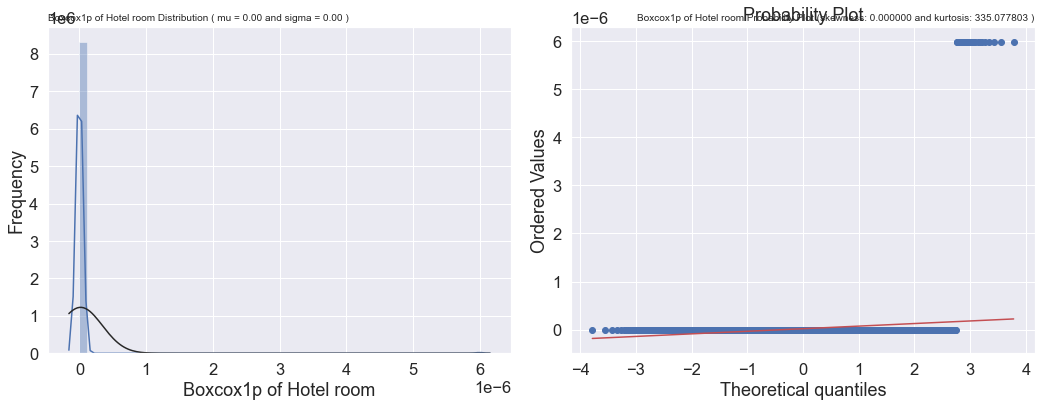

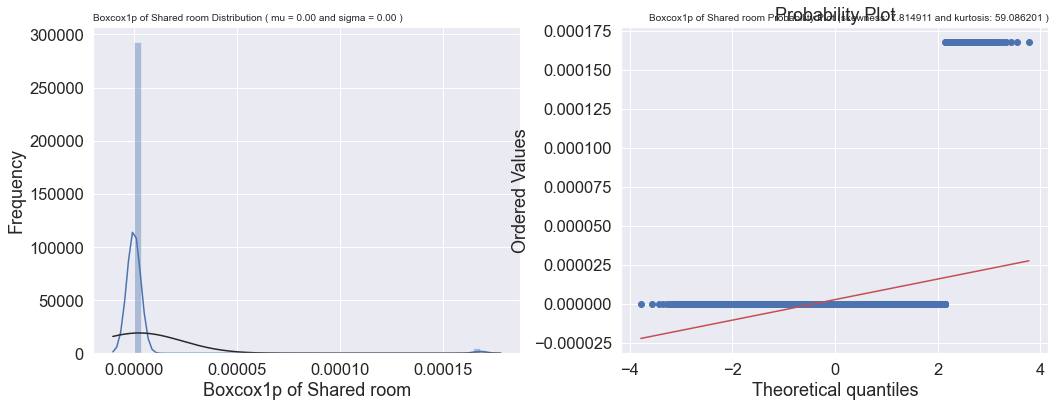

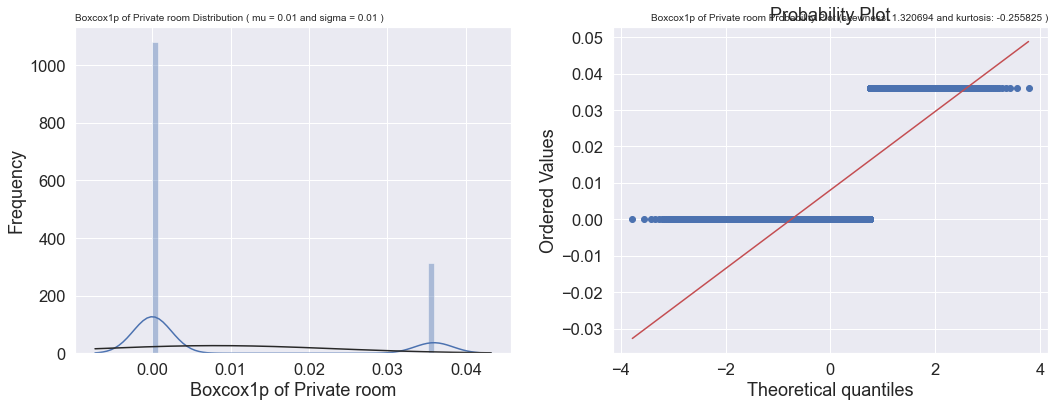

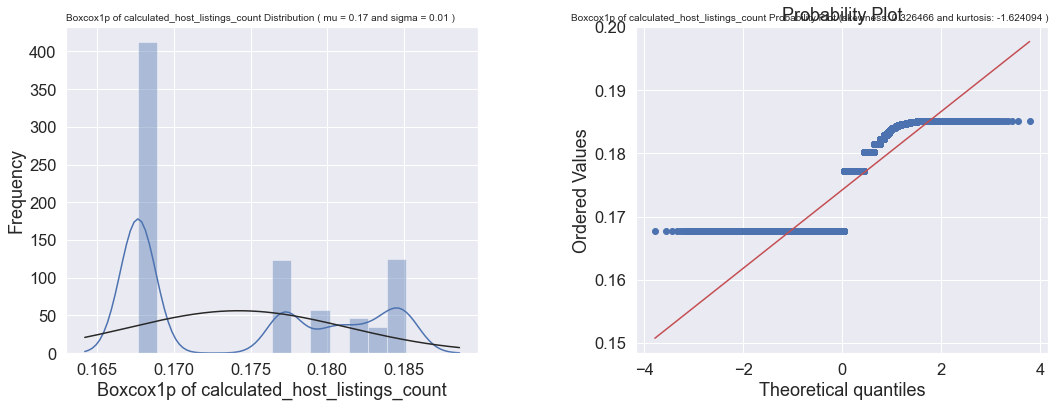

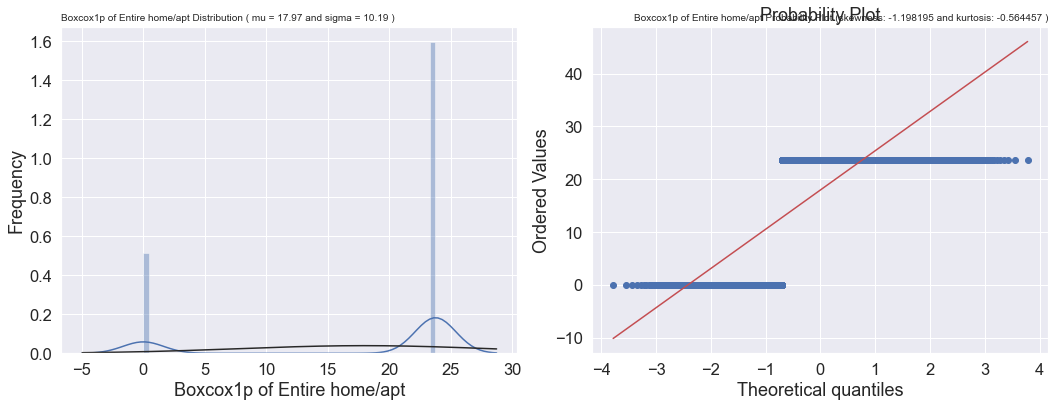

In [214]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(15,6))
    fig.subplots_adjust(top=0.5, wspace=0.3)
    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='left',fontsize = 10)
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.\
                   format(data.skew(), data.kurt()), loc='right',fontsize = 10)

    plt.tight_layout()
    plt.show()
    
for feat in skewness.index:
    QQ_plot(df[feat], ('Boxcox1p of {}'.format(feat)))

In [215]:
from sklearn.preprocessing import StandardScaler

In [216]:
scaler = StandardScaler()

In [248]:
numeric_features = list(df.dtypes[(df.dtypes != "str") & (df.dtypes !='object')].index)
numeric_features

['review_count',
 'listing_id',
 'host_id',
 'neighbourhood',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'Entire home/apt',
 'Hotel room',
 'Private room',
 'Shared room']

In [249]:
numeric_features.remove('last_review')
numeric_features.remove('price')

In [250]:
numeric_features

['review_count',
 'listing_id',
 'host_id',
 'neighbourhood',
 'latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'Entire home/apt',
 'Hotel room',
 'Private room',
 'Shared room']

In [251]:
scaler.fit(df[numeric_features])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [252]:
scaled_features = scaler.transform(df[numeric_features])

In [253]:
df_feat = pd.DataFrame(scaled_features,columns=['review_count',
 'listing_id',
 'host_id',
 'neighbourhood',
 'latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'Entire home/apt',
 'Hotel room',
 'Private room',
 'Shared room'])
df_feat.head()

review_count  listing_id  host_id  neighbourhood  latitude  longitude  \
0       2.48430    -1.74646 -0.97300        0.00012   0.00000    0.55721   
1       2.39747    -1.81019 -1.55475       -0.87175   0.00000   -0.40565   
2       2.39380    -1.71160 -1.67079       -0.87175   0.00000   -0.08657   
3       2.38451    -1.75209 -1.00955        0.04855   0.00000    1.28682   
4       2.35672    -1.81119 -1.58849       -0.87175   0.00000    0.09425   

   minimum_nights  number_of_reviews  reviews_per_month  \
0        -1.11931            2.48430            2.10410   
1         0.21876            2.39747            1.86876   
2        -1.11931            2.39380            2.03862   
3        -1.11931            2.38451            1.96872   
4        -1.11931            2.35672            1.81214   

   calculated_host_listings_count  availability_365  Entire home/apt  \
0                        -0.92277          -0.28792          0.56668   
1                        -0.92277           0.34578         -1.76467   
2                        -0.92277           1.34790          0.56668   
3                         0.42349           1.63528         -1.76467   
4                         0.42349           1.27422          0.56668   

   Hotel room  Private room  Shared room  
0    -0.05432      -0.53806     -0.12595  
1    -0.05432       1.85853     -0.12595  
2    -0.05432      -0.53806     -0.12595  
3    -0.05432       1.85853     -0.12595  
4    -0.05432      -0.53806     -0.12595

In [247]:
from sklearn.model_selection import train_test_split

In [295]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['price'],
                                                    test_size=0.30)

In [297]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [372]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(15,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='linear'))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity'])

In [373]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Train on 6185 samples, validate on 2652 samples
Epoch 1/200
6185/6185 [==============================] - 1s 94us/sample - loss: 7.5205 - mean_squared_error: 7.5205 - mean_absolute_error: 2.7178 - mean_absolute_percentage_error: 45827.3984 - cosine_proximity: -0.1182 - val_loss: 6.8951 - val_mean_squared_error: 6.8951 - val_mean_absolute_error: 2.6048 - val_mean_absolute_percentage_error: 94.3412 - val_cosine_proximity: -0.5121
Epoch 2/200
6185/6185 [==============================] - 0s 16us/sample - loss: 6.1494 - mean_squared_error: 6.1494 - mean_absolute_error: 2.4290 - mean_absolute_percentage_error: 81675.4062 - cosine_proximity: -0.7093 - val_loss: 5.0421 - val_mean_squared_error: 5.0421 - val_mean_absolute_error: 2.1970 - val_mean_absolute_percentage_error: 79.5933 - val_cosine_proximity: -0.9811
Epoch 3/200
6185/6185 [==============================] - 0s 16us/sample - loss: 4.4220 - mean_squared_error: 4.4220 - mean_absolute_error: 1.9848 - mean_absolute_percentage_error: 131388

6185/6185 [==============================] - 0s 15us/sample - loss: 0.9180 - mean_squared_error: 0.9180 - mean_absolute_error: 0.7795 - mean_absolute_percentage_error: 980963.1875 - cosine_proximity: -0.9997 - val_loss: 0.2227 - val_mean_squared_error: 0.2227 - val_mean_absolute_error: 0.3973 - val_mean_absolute_percentage_error: 13.9747 - val_cosine_proximity: -1.0000
Epoch 23/200
6185/6185 [==============================] - 0s 15us/sample - loss: 0.8636 - mean_squared_error: 0.8636 - mean_absolute_error: 0.7527 - mean_absolute_percentage_error: 763994.8125 - cosine_proximity: -0.9997 - val_loss: 0.2250 - val_mean_squared_error: 0.2250 - val_mean_absolute_error: 0.4013 - val_mean_absolute_percentage_error: 14.1001 - val_cosine_proximity: -1.0000
Epoch 24/200
6185/6185 [==============================] - 0s 17us/sample - loss: 0.8149 - mean_squared_error: 0.8149 - mean_absolute_error: 0.7271 - mean_absolute_percentage_error: 937988.9375 - cosine_proximity: -0.9997 - val_loss: 0.2154 - v

6185/6185 [==============================] - 0s 17us/sample - loss: 0.5694 - mean_squared_error: 0.5694 - mean_absolute_error: 0.5970 - mean_absolute_percentage_error: 844443.1875 - cosine_proximity: -0.9997 - val_loss: 0.1268 - val_mean_squared_error: 0.1268 - val_mean_absolute_error: 0.2882 - val_mean_absolute_percentage_error: 10.0728 - val_cosine_proximity: -1.0000
Epoch 44/200
6185/6185 [==============================] - 0s 17us/sample - loss: 0.5671 - mean_squared_error: 0.5671 - mean_absolute_error: 0.6009 - mean_absolute_percentage_error: 624154.6250 - cosine_proximity: -0.9997 - val_loss: 0.1286 - val_mean_squared_error: 0.1286 - val_mean_absolute_error: 0.2914 - val_mean_absolute_percentage_error: 10.1842 - val_cosine_proximity: -1.0000
Epoch 45/200
6185/6185 [==============================] - 0s 17us/sample - loss: 0.5581 - mean_squared_error: 0.5581 - mean_absolute_error: 0.5949 - mean_absolute_percentage_error: 625330.4375 - cosine_proximity: -0.9997 - val_loss: 0.1240 - v

6185/6185 [==============================] - 0s 16us/sample - loss: 0.4230 - mean_squared_error: 0.4230 - mean_absolute_error: 0.5170 - mean_absolute_percentage_error: 669053.4375 - cosine_proximity: -0.9997 - val_loss: 0.1078 - val_mean_squared_error: 0.1078 - val_mean_absolute_error: 0.2611 - val_mean_absolute_percentage_error: 9.1391 - val_cosine_proximity: -1.0000
Epoch 65/200
6185/6185 [==============================] - 0s 16us/sample - loss: 0.4335 - mean_squared_error: 0.4335 - mean_absolute_error: 0.5208 - mean_absolute_percentage_error: 929872.5625 - cosine_proximity: -0.9997 - val_loss: 0.1043 - val_mean_squared_error: 0.1043 - val_mean_absolute_error: 0.2559 - val_mean_absolute_percentage_error: 8.9672 - val_cosine_proximity: -1.0000
Epoch 66/200
6185/6185 [==============================] - 0s 16us/sample - loss: 0.4289 - mean_squared_error: 0.4289 - mean_absolute_error: 0.5196 - mean_absolute_percentage_error: 697337.8750 - cosine_proximity: -0.9997 - val_loss: 0.1054 - val

6185/6185 [==============================] - 0s 17us/sample - loss: 0.3467 - mean_squared_error: 0.3467 - mean_absolute_error: 0.4691 - mean_absolute_percentage_error: 862844.7500 - cosine_proximity: -0.9997 - val_loss: 0.0911 - val_mean_squared_error: 0.0911 - val_mean_absolute_error: 0.2351 - val_mean_absolute_percentage_error: 8.2828 - val_cosine_proximity: -1.0000
Epoch 86/200
6185/6185 [==============================] - 0s 17us/sample - loss: 0.3462 - mean_squared_error: 0.3462 - mean_absolute_error: 0.4703 - mean_absolute_percentage_error: 850050.6875 - cosine_proximity: -0.9997 - val_loss: 0.0885 - val_mean_squared_error: 0.0885 - val_mean_absolute_error: 0.2314 - val_mean_absolute_percentage_error: 8.1660 - val_cosine_proximity: -1.0000
Epoch 87/200
6185/6185 [==============================] - 0s 18us/sample - loss: 0.3394 - mean_squared_error: 0.3394 - mean_absolute_error: 0.4604 - mean_absolute_percentage_error: 875858.7500 - cosine_proximity: -0.9997 - val_loss: 0.0926 - val

6185/6185 [==============================] - 0s 16us/sample - loss: 0.2787 - mean_squared_error: 0.2787 - mean_absolute_error: 0.4184 - mean_absolute_percentage_error: 662923.8750 - cosine_proximity: -0.9997 - val_loss: 0.0833 - val_mean_squared_error: 0.0833 - val_mean_absolute_error: 0.2234 - val_mean_absolute_percentage_error: 7.9165 - val_cosine_proximity: -1.0000
Epoch 107/200
6185/6185 [==============================] - 0s 16us/sample - loss: 0.2777 - mean_squared_error: 0.2777 - mean_absolute_error: 0.4175 - mean_absolute_percentage_error: 885486.4375 - cosine_proximity: -0.9997 - val_loss: 0.0846 - val_mean_squared_error: 0.0846 - val_mean_absolute_error: 0.2252 - val_mean_absolute_percentage_error: 7.9705 - val_cosine_proximity: -1.0000
Epoch 108/200
6185/6185 [==============================] - 0s 16us/sample - loss: 0.2730 - mean_squared_error: 0.2730 - mean_absolute_error: 0.4125 - mean_absolute_percentage_error: 896658.9375 - cosine_proximity: -0.9997 - val_loss: 0.0862 - v

6185/6185 [==============================] - 0s 19us/sample - loss: 0.2238 - mean_squared_error: 0.2238 - mean_absolute_error: 0.3728 - mean_absolute_percentage_error: 773296.8125 - cosine_proximity: -0.9997 - val_loss: 0.0786 - val_mean_squared_error: 0.0786 - val_mean_absolute_error: 0.2164 - val_mean_absolute_percentage_error: 7.7081 - val_cosine_proximity: -1.0000
Epoch 128/200
6185/6185 [==============================] - 0s 16us/sample - loss: 0.2179 - mean_squared_error: 0.2179 - mean_absolute_error: 0.3641 - mean_absolute_percentage_error: 875299.8750 - cosine_proximity: -0.9997 - val_loss: 0.0785 - val_mean_squared_error: 0.0785 - val_mean_absolute_error: 0.2163 - val_mean_absolute_percentage_error: 7.7040 - val_cosine_proximity: -1.0000
Epoch 129/200
6185/6185 [==============================] - 0s 16us/sample - loss: 0.2159 - mean_squared_error: 0.2159 - mean_absolute_error: 0.3660 - mean_absolute_percentage_error: 981981.5625 - cosine_proximity: -0.9997 - val_loss: 0.0782 - v

6185/6185 [==============================] - 0s 16us/sample - loss: 0.1754 - mean_squared_error: 0.1754 - mean_absolute_error: 0.3285 - mean_absolute_percentage_error: 810664.3125 - cosine_proximity: -0.9997 - val_loss: 0.0727 - val_mean_squared_error: 0.0727 - val_mean_absolute_error: 0.2079 - val_mean_absolute_percentage_error: 7.4539 - val_cosine_proximity: -1.0000
Epoch 149/200
6185/6185 [==============================] - 0s 16us/sample - loss: 0.1653 - mean_squared_error: 0.1653 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 805867.9375 - cosine_proximity: -0.9997 - val_loss: 0.0732 - val_mean_squared_error: 0.0732 - val_mean_absolute_error: 0.2086 - val_mean_absolute_percentage_error: 7.4762 - val_cosine_proximity: -1.0000
Epoch 150/200
6185/6185 [==============================] - 0s 16us/sample - loss: 0.1710 - mean_squared_error: 0.1710 - mean_absolute_error: 0.3233 - mean_absolute_percentage_error: 889930.0625 - cosine_proximity: -0.9997 - val_loss: 0.0716 - v

6185/6185 [==============================] - 0s 16us/sample - loss: 0.1316 - mean_squared_error: 0.1316 - mean_absolute_error: 0.2848 - mean_absolute_percentage_error: 953632.6875 - cosine_proximity: -0.9997 - val_loss: 0.0675 - val_mean_squared_error: 0.0675 - val_mean_absolute_error: 0.2001 - val_mean_absolute_percentage_error: 7.2313 - val_cosine_proximity: -1.0000
Epoch 170/200
6185/6185 [==============================] - 0s 16us/sample - loss: 0.1300 - mean_squared_error: 0.1300 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 829957.3750 - cosine_proximity: -0.9997 - val_loss: 0.0673 - val_mean_squared_error: 0.0673 - val_mean_absolute_error: 0.1996 - val_mean_absolute_percentage_error: 7.2111 - val_cosine_proximity: -1.0000
Epoch 171/200
6185/6185 [==============================] - 0s 19us/sample - loss: 0.1235 - mean_squared_error: 0.1235 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 945933.8125 - cosine_proximity: -0.9997 - val_loss: 0.0669 - v

6185/6185 [==============================] - 0s 16us/sample - loss: 0.1032 - mean_squared_error: 0.1032 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 876471.8125 - cosine_proximity: -0.9997 - val_loss: 0.0632 - val_mean_squared_error: 0.0632 - val_mean_absolute_error: 0.1946 - val_mean_absolute_percentage_error: 7.0594 - val_cosine_proximity: -1.0000
Epoch 191/200
6185/6185 [==============================] - 0s 16us/sample - loss: 0.0994 - mean_squared_error: 0.0994 - mean_absolute_error: 0.2442 - mean_absolute_percentage_error: 904746.4375 - cosine_proximity: -0.9997 - val_loss: 0.0618 - val_mean_squared_error: 0.0618 - val_mean_absolute_error: 0.1922 - val_mean_absolute_percentage_error: 7.0017 - val_cosine_proximity: -1.0000
Epoch 192/200
6185/6185 [==============================] - 0s 16us/sample - loss: 0.0988 - mean_squared_error: 0.0988 - mean_absolute_error: 0.2438 - mean_absolute_percentage_error: 861324.6250 - cosine_proximity: -0.9997 - val_loss: 0.0619 - v

In [374]:
losses = pd.DataFrame(model.history.history)

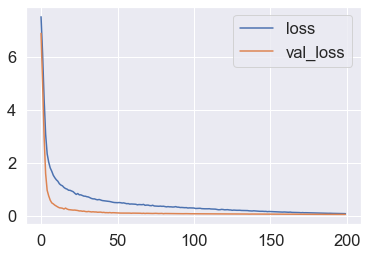

In [375]:
losses[['loss','val_loss']].plot()

In [376]:
from sklearn.metrics import classification_report,confusion_matrix

In [377]:
predictions = model.predict(X_test)

In [378]:
predictions

array([[2.71493  ],
       [2.853806 ],
       [2.635806 ],
       ...,
       [2.6067774],
       [2.6699595],
       [2.645669 ]], dtype=float32)

In [379]:
y_test

array([[2.7842323 ],
       [3.29403452],
       [2.87538311],
       ...,
       [2.65588692],
       [2.75592999],
       [2.95253168]])

In [322]:
from sklearn.metrics import mean_squared_error

In [380]:
mean_squared_error(y_test,predictions)

0.06080018684260911

In [370]:
from sklearn.metrics import r2_score, mean_absolute_error

In [381]:
r2_score(y_test,predictions)
print('\n')
mean_absolute_error(y_test,predictions)

0.19076043363548445

In [383]:
print(utils.multiclass.type_of_target(predictions))

continuous


In [384]:
predenc = lbenc.fit_transform(predictions)

In [336]:
from sklearn.ensemble import RandomForestClassifier

In [337]:
rfc = RandomForestClassifier(n_estimators=600)

In [341]:
from sklearn.preprocessing import LabelEncoder

In [342]:
from sklearn import utils

In [343]:
print(utils.multiclass.type_of_target(y_train))

continuous


In [357]:
print(utils.multiclass.type_of_target(X_train))

continuous-multioutput


In [344]:
lbenc = LabelEncoder()

In [345]:
y_trainenc = lbenc.fit_transform(y_train)
y_testenc = lbenc.fit_transform(y_test)

In [354]:
rfc.fit(X_train,y_trainenc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [355]:
predictions = rfc.predict(X_test)

In [356]:
print(classification_report(y_testenc,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00        21
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         5
          17       0.00    

In [ ]:
print(utils.multiclass.type_of_target(y_train))